<a href="https://colab.research.google.com/github/kit1412/basicprojects/blob/pythoncodes/Assignment09_07_11_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Solve the given linear programming problem
Max Z = 5x1 − 2x2 + 3x3
s.t. 2x1 + 2x2 − x3 ≥ 2
3x1 − 4x2 ≤ 3
x2 + 3x3 ≤ 5
x1, x2, x3 ≥ 0

In [ ]:
import numpy as np
from scipy.optimize import linprog

coeff = np.array([[-2, -2, 1], [3, -4, 0], [0, 1, 3], [-1, 0, 0], [0, -1, 0], [0, 0, -1]])
rhs = np.array([-2, 3, 5, 0, 0, 0])
#constraints

max = np.array([-5, 2, -3])
#coefficients of the objective function

lpp = linprog(max, coeff, rhs)
#passing values to the function

print("Optimal solution = ", round(lpp.fun * -1, ndigits = 2))
#for maximization * -1
print("Values = ", lpp.x)
print("Number of iterations = ", lpp.nit)
print("Status message = ", lpp.message)
#printing the optimal and feasible solution

Optimal solution =  28.33
Values =  [7.66666667e+00 5.00000000e+00 6.63261349e-11]
Number of iterations =  5
Status message =  Optimization terminated successfully.


2. Find the roots of the following equation ax3 + bx2 + cx + d. Find whether
your solution converged or not. Also plot a graph showing the roots.
(Consider your own values for a, b, c and d. You can free to select your
initial guesses accordingly)


The solution has converged
The roots are =  [0.99999892 2.00000113 3.00000108]


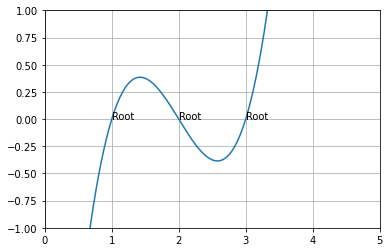

In [ ]:
import numpy as np
from scipy.optimize import root
import matplotlib.pyplot as plt

def cubicEqn(x):  
  return (x ** 3) - 6 * (x ** 2) + 11 * x - 6

ans = root(cubicEqn, [0, 1.5, 4], method='broyden1')  
#obtaining the roots of the equation
#print(ans)

if ans.success == "False":
  print("The solution has not converged")
else:
  print("The solution has converged")
  print("The roots are = ", ans.x)
  #print(ans)
  #print(np.roots([1, -6, 11, -6]))    

x = np.linspace(0, 5, 256, endpoint = True)
#y = (x ** 3) - 6 * (x ** 2) + 11 * x - 6

plt.plot(x, y)
plt.grid()
#plt.title("Graph showing roots")

axes = plt.gca()
axes.set_xlim([x.min(), x.max()])
axes.set_ylim([-1, 1])

for i in range(0, 3):
 plt.annotate("Root", (ans.x[i], 0))


3. Ackley function is defined as
f(x, y) = −20e
−0.2
√
0.5(x2+y2) − e
0.5(cos(2πx)+cos(2πy)) + e + 20
where e is the irrational number having value in between 2.71 and 2.72.
Plot the function. Use Broyden-Fletcher-Goldfarb-Shanno (BFGS) method
and Nelder- Mead simplex method for obtaining global minima. Locate
both the minimum points in the plot. Which method is more accurate?
[Hint: Search for scipy.optimize ]


The value using BFGS method =  [-2.93872837e-09]
The value using Nelder-Mead method =  [0.96943359]


The BFGS method is more accurate
The green colour represents the BFGS minimum and the cyan the Nelder-Mean minimum


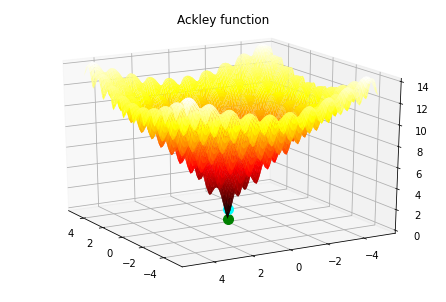

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#to construct a 3D plot
from scipy import optimize

fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)
#setting up the mesh as required, along with the desired limits


Z = -20 * np.exp(-0.2 * np.sqrt(0.5 * (X**2 + Y**2))) - np.exp(0.5 * (np.cos(2 * np.pi * X) + np.cos(2 * np.pi * Y))) + np.exp(1) + 20
#setting the Z axis as the value of the function

def f(X, Y):
  return -20 * np.exp(-0.2 * np.sqrt(0.5 * (X**2 + Y**2))) - np.exp(0.5 * (np.cos(2 * np.pi * X) + np.cos(2 * np.pi * Y))) + np.exp(1) + 20

bfgs = optimize.minimize(f, 1, 1, method='BFGS')
print("The value using BFGS method = ", bfgs.x)
#using the bfgs method
#print(bfgs)

nm = optimize.minimize(f, 1, 1, method='Nelder-Mead')
print("The value using Nelder-Mead method = ", nm.x)
#using the nelder-mead method

if bfgs.x < nm.x:
  print("\n\nThe BFGS method is more accurate")
else:
  print("\n\nThe Nelder-Mead method is more accurate")

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.hot)
ax.set_zlim(0, 14)
#setting the limits and finally plotting the function
ax.set_title("Ackley function")
#title

print("The green colour represents the BFGS minimum and the cyan the Nelder-Mean minimum")
ax.scatter3D(0, 0, bfgs.x, color="green", s=100)
ax.scatter3D(0, 0, nm.x, color="cyan", s=100)

ax.view_init(20, 150)
#attempting to rotate the plot for better view of the point behind
plt.show()


#plt.show()
#plotting the graph

#The second point is behind 

#print("To show it better in a 2D view")
#N=100
#x = np.arange(-100,100+1/N,1/N)
#y = -20*np.exp(-0.2*np.sqrt(0.5*x**2))-np.exp(0.5*(np.cos(2*np.pi*x)))+np.exp(1)+20

#plt.plot(x,y)
#axes = plt.gca()
#axes.set_xlim([-5, 5])
#axes.set_ylim([0, 5])

#plt.annotate("BFGS", (0, bfgs.x))
#plt.annotate("NM", (0, nm.x))
#plt.grid()
#plt.show()

4. Given a set of points in eucledian plane, convex hull is defined as the
smallest area convex polygon that encompasses all the points. Create n
number of 2 - d points as n by 2 matrix and show its convex hull. [Hint:
Search for scipy.spatial ]

Enter the value of n	99


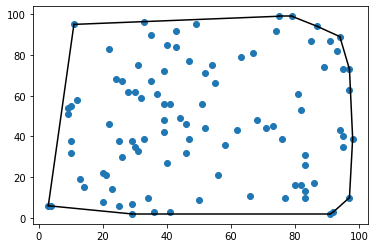

In [ ]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import numpy as np
import matplotlib.pyplot as plt

n = int(input("Enter the value of n\t"))

points = np.zeros((n, 2))

for i in range(0, n):
  for j in range(0, 2):
    points[i, j] = np.random.randint(1, 100)

#print(points)

hull = ConvexHull(points)
#creating a hull from random points

plt.plot(points[:,0], points[:,1], 'o')
for i in hull.simplices:
    plt.plot(points[i, 0], points[i, 1], 'k-')

#plt.plot(points[hull.vertices,0], points[hull.vertices,1], 'r--', lw=2)
#plt.plot(points[hull.vertices[0],0], points[hull.vertices[0],1], 'ro')
plt.show()

5. A dataset containing weekly monthly and yearly sales of shop is given in
the dataset data.csv. Find the following
(a) Plot a histogram with a bin size of 10.
1
(b) Plot the monthly sales(Months vs Total sales), daily sales(days vs
total sales) and hourly sales(Hours vs total sales)

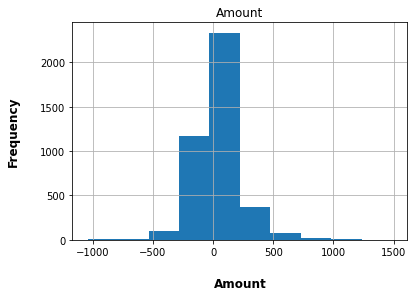

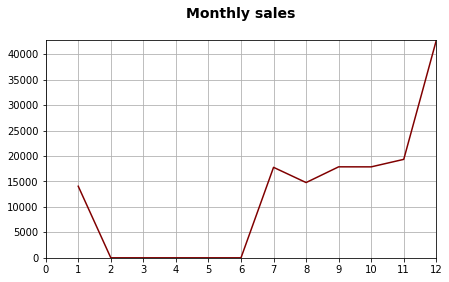

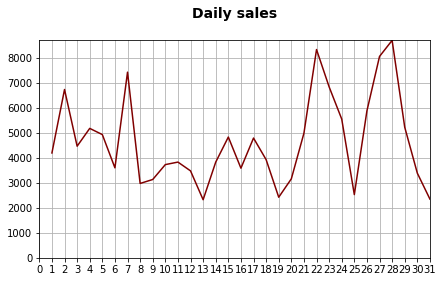

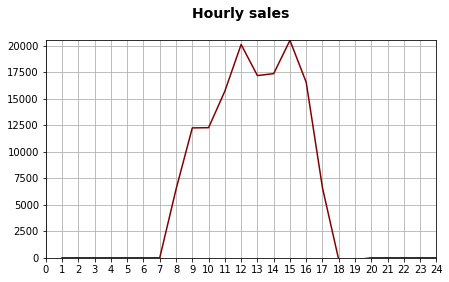

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import numpy as np

def getnums(s, e,i):
   return list(range(s, e,i))

sales = pd.read_csv("data.csv")

#print(sales)

sales["Amount"] = sales["Amount"].str.replace('$', '').str.replace(',' , '')
errors='coerce'
sales["Amount"] = sales["Amount"].apply(pd.to_numeric,errors='coerce')
#sales["Amount"] = pd.to_numeric(sales["Amount"])

sales["Day"] = pd.to_numeric(sales["Day"])
sales["Hour"] = pd.to_numeric(sales["Hour"])
sales["Month"] = pd.to_numeric(sales["Month"])
#converting the required columns to numeric values

#print(sales)

ax = sales.hist(column="Amount", bins=10)
ax = ax[0]

for x in ax:
  x.set_xlabel("Amount", labelpad=20, weight='bold', size=12)
  x.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)
  #providing labels
 

month = np.zeros(13)
day = np.zeros(32)
hour = np.zeros(25)
#creating empty arrays, also the values will be stored from index 1 only

#print(sales["Day"][1])
for i in range(len(sales)):
  month[sales["Month"][i]] += sales["Amount"][i]
  day[sales["Day"][i]] += sales["Amount"][i]
  hour[sales["Hour"][i]] += sales["Amount"][i]
#finding the sum of each sales  

#plotting the monthly sales
fig = plt.figure(figsize =(7, 4))
plt.plot(getnums(1, 13, 1), month[1:], color="maroon")
plt.title(label="Monthly sales\n", fontdict=None, weight="bold", size=14)

plt.xticks(getnums(0, 13, 1))
#to make all the x-coordinates visible

plt.grid()

axes = plt.gca()
axes.set_xlim([0, 12])
axes.set_ylim([0, max(month)])

plt.show()

#plotting the daily sales
fig = plt.figure(figsize =(7, 4))
plt.plot(getnums(1, 32, 1), day[1:], color="maroon")
plt.title(label="Daily sales\n", fontdict=None, weight="bold", size=14)

plt.xticks(getnums(0, 32, 1))
#to make all the x-coordinates visible

plt.grid()

axes = plt.gca()
axes.set_xlim([0, 31])
axes.set_ylim([0, max(day)])

plt.show()

#plotting the hourly sales
fig = plt.figure(figsize =(7, 4))
plt.plot(getnums(1, 25, 1), hour[1:], color="maroon")
plt.title(label="Hourly sales\n", fontdict=None, weight="bold", size=14)

plt.xticks(getnums(0, 25, 1))
#to make all the x-coordinates visible, and to start the graph at (0, 0)
plt.grid()

axes = plt.gca()
axes.set_xlim([0, 24])
axes.set_ylim([0, max(hour)])

plt.show()

6. Create a pandas DataFrame with the following column names Company
Name(7 names), Turnover (Randomly generate 7 instances from 100000
to 900000) Market share(of the turnover of those companies in %age).
(a) Represent the market share in pie chart.
(b) Create bars to represent the turnover for each company.
(c) On the opposite axis, draw a line to show each market share. (Hint:
use ax.twinx()) Keep in mind that showing too much information on
a graph can be overwhelming


  Company Name  Turnover  Market share
0          dju  775298.0     20.338907
1            f  855302.0     22.437706
2           kz  225143.0      5.906326
3          ezh  140615.0      3.688847
4           vh  540894.0     14.189632
5            e  857007.0     22.482434
6            n  417637.0     10.956149


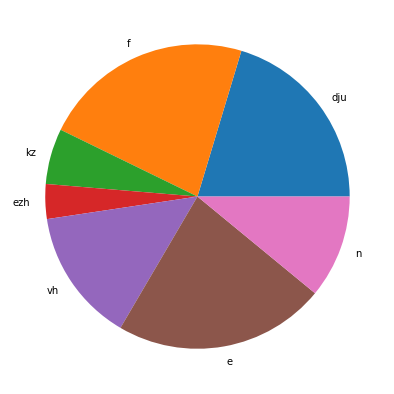

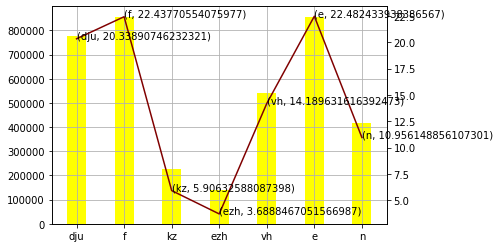

In [ ]:
import pandas as pd
import numpy as np
import string
import random
import matplotlib.pyplot as plt

def names(length):
    letters = string.ascii_lowercase
    result = ''.join(random.choice(letters) for i in range(length))
    return result
#returning random strings of lengths 1 to 5    

name = []
market = np.zeros(7)
turnover = np.zeros(7)
#creating the numpy arrays

sum = 0

for i in range(7):
  name.append(names(np.random.randint(1, 5)))
  turnover[i] = np.random.randint(100000, 900000)
  sum += turnover[i] #finding the sum of all turnovers
#randomly assigning values

for i in range(7):
  market[i] = turnover[i]/sum * 100
#calculating the market share for each company

dict = {"Company Name":name, "Turnover":turnover, "Market share":market}
#creating a dictionary

df = pd.DataFrame(dict)  #creating a pandas dataframe
print(df)

fig = plt.figure(figsize =(10, 7)) 
plt.pie(market, labels = name)  
plt.show()
#making a pie chart out of the market shares

plt.bar(name, turnover, color="yellow", width=.4)
plt.grid() #making a grid

#making a bar chart out of the turnover values

ax = plt.twinx()
ax.plot(name, market, '-r', label = 'Market share', color="maroon")

for i_x, i_y in zip(name, market):
    plt.text(i_x, i_y, '({}, {})'.format(i_x, i_y))
#to print the coordinates of each point    

plt.show() #displaying the final bar graph

7. Generate 100 random integers from 0 to 10 and make a bar chart for
numbers versus its frequency. Also, draw a pie chart for this.


    Element  Frequency
0         0         12
1         1         11
2         2         11
3         3          7
4         4          8
5         5         10
6         6          8
7         7          5
8         8         13
9         9          9
10       10          6


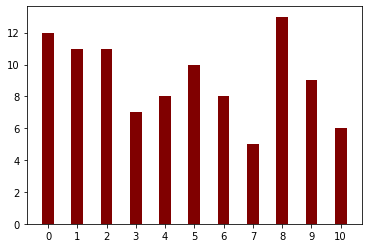

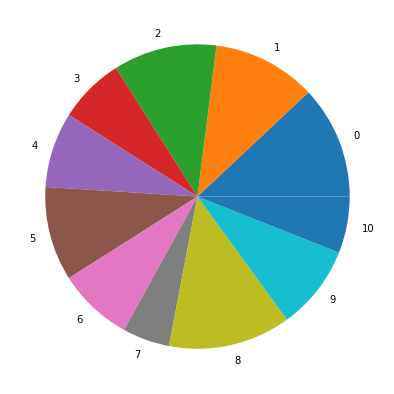

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

arr = np.zeros(100)

for i in range(100):
  arr[i] = np.random.randint(0, 11)
#random numbers between 0 and 10 - both inclusive

freq = np.unique(arr, return_counts=True)
#print(freq[0])
#print(freq[1])

df = pd.DataFrame(list(zip([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], freq[1])), columns =['Element', 'Frequency'])
print(df)
#creating a pandas dataframe

plt.bar([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], freq[1], color="maroon", width=.4)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.show()
#making a bar plot and showing all the x-coordinates

fig = plt.figure(figsize =(10, 7)) 
plt.pie(freq[1], labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  
plt.show()